<a href="https://colab.research.google.com/github/adityajain17/ML-and-DL-Models/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Fashiom MNIST Dataset

In [46]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

T-shirt/top


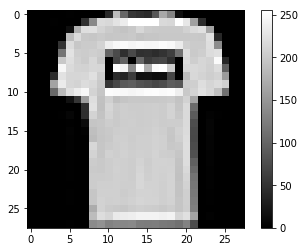

In [21]:
plt.imshow(X_train[1],cmap='gray')
plt.colorbar()
print(class_names[y_train[1]])

In [22]:
X_train.shape

(60000, 28, 28)

In [23]:
X_test.shape

(10000, 28, 28)

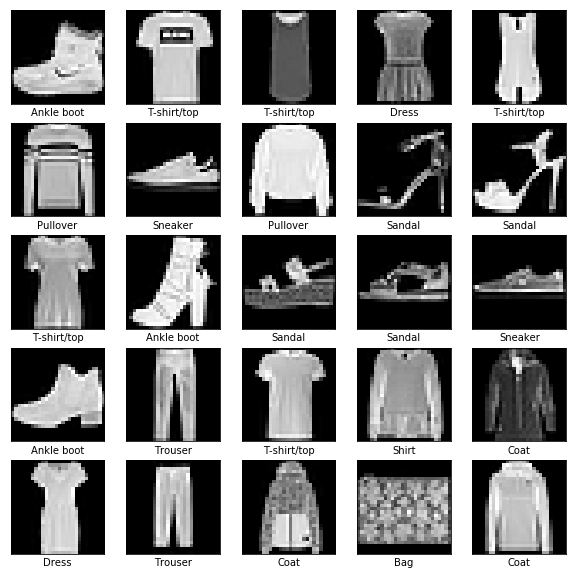

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [0]:
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Pre-Process Images
X_train=X_train/255.0
X_test=X_test/255.0

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
X_test.shape

(10000, 28, 28)

T-shirt/top


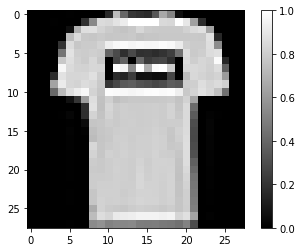

In [28]:
plt.imshow(X_train[1].reshape(28,28),cmap='gray')
plt.colorbar()
print(class_names[y_train[1]])

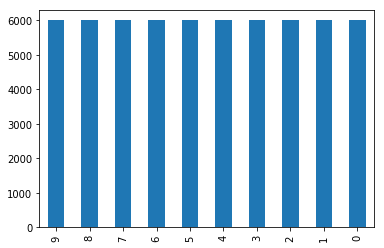

In [29]:
y_train_data=pd.DataFrame({'categories':y_train})
y_train_data['categories'].value_counts().plot.bar()

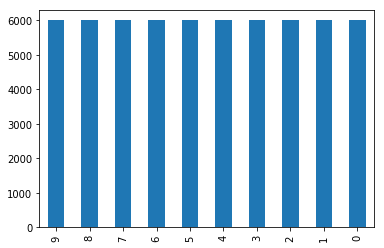

In [31]:
y_test_data=pd.DataFrame({'categories':y_train})
y_test_data['categories'].value_counts().plot.bar()

Deep Learning

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,BatchNormalization,Activation

model= Sequential()
model.add(Flatten(input_shape=(28,28)))

model.add(Dense(256, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(output_dim = 10, kernel_initializer = 'uniform', activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size =32,nb_epoch = 40)

In [0]:
model.summary()

In [0]:
y_pred = model.predict_classes(X_test)

In [0]:
model.save('Fashion MNIST 89.63% ANN.h5')

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix',cm)
print('Accuracy Score',accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report,f1_score
print('Classification Report \n',classification_report(y_test, y_pred))

In [0]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('Test accuracy:', test_acc)

In [0]:
predictions = model.predict(X_test)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

In [0]:
#Pre-Processing required for CNN
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [36]:
X_train.shape

(60000, 28, 28, 1)

In [35]:
X_test.shape

(10000, 28, 28, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(4, 4), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(6, 6), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(4, 4), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, \
                          verbose=1, mode='auto')
callbacks_list = [earlystop]

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        32832     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)       

In [42]:
model_info=model.fit(X_train,y_train,batch_size=30,epochs=50)

Epoch 1/50
60000/60000 [==============================] - 33s 542us/sample - loss: 0.1919 - acc: 0.9302
Epoch 2/50
60000/60000 [==============================] - 32s 539us/sample - loss: 0.1881 - acc: 0.9337
Epoch 3/50
60000/60000 [==============================] - 32s 531us/sample - loss: 0.1885 - acc: 0.9338
Epoch 4/50
60000/60000 [==============================] - 32s 538us/sample - loss: 0.1843 - acc: 0.9337
Epoch 5/50
60000/60000 [==============================] - 32s 534us/sample - loss: 0.1875 - acc: 0.9331
Epoch 6/50
60000/60000 [==============================] - 32s 539us/sample - loss: 0.1864 - acc: 0.9345
Epoch 7/50
60000/60000 [==============================] - 32s 538us/sample - loss: 0.1757 - acc: 0.9370
Epoch 8/50
60000/60000 [==============================] - 32s 539us/sample - loss: 0.1773 - acc: 0.9373
Epoch 9/50
60000/60000 [==============================] - 32s 538us/sample - loss: 0.1788 - acc: 0.9365
Epoch 10/50
60000/60000 [==============================] - 32s 5

In [0]:
model.save('Fahion MNIST 93.41%.h5')

In [43]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('Test accuracy:', test_acc

10000/10000 [==============================] - 2s 182us/sample - loss: 0.2289 - acc: 0.9341
Test accuracy: 0.9341


In [0]:
# list all data in history
print(model_info.history.keys())
# summarize history for accuracy
plt.plot(model_info.history['acc'])
plt.plot(model_info.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()